Design and develop a shallow neural network to classify handwritten digits from handwritten digits MNIST dataset
Procedure:
1.	Design a shallow neural network for classifying handwritten digits in the MNIST dataset.
2.	Load the MNIST dataset and get training and testing images.
3.	Create a model that maps your inputs to your targets.
4.	Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.
5.	Iterate your training data by calling the fit() method of your model.
6.	Evaluate the model on testing data to check the model’s accuracy.


#Step 1 : import neccesary library
1)TensorFlow is a popular framework for machine learning and deep learning. It includes tools for building and training neural networks.
2) Imports the Sequential model class from Keras, which is part of TensorFlow->Sequential is a simple way to build a neural network layer by layer in a linear stack.
3) Flatten: Converts a 2D image (like 28×28) into a 1D array (784 values).
        Used as the first layer to prepare image input for the dense layers.
   Dense: Fully connected neural network layer.
         Used to build hidden and output layers.
4)Imports the MNIST(Modified National Institute of Standards and Technology database) dataset loader-
 is a classic dataset of handwritten digits (0 to 9), built into Keras for easy access.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 2: Load and preprocess the data
Original pixel values range from 0 to 255.
Dividing by 255 scales them to the range 0 to 1.
This normalization helps neural networks train faster and better by keeping inputs small and consistent.

In [ ]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Normalize pixel values from 0–255 to 0–1
#Convert labels to one-hot vectors

x_train = x_train / 255.0
x_test = x_test / 255.0


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8712 - loss: 0.4606 - val_accuracy: 0.9660 - val_loss: 0.1255
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9636 - loss: 0.1259 - val_accuracy: 0.9742 - val_loss: 0.0878
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9754 - loss: 0.0816 - val_accuracy: 0.9755 - val_loss: 0.0838
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9825 - loss: 0.0577 - val_accuracy: 0.9788 - val_loss: 0.0774
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9856 - loss: 0.0470 - val_accuracy: 0.9777 - val_loss: 0.0724
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9753 - loss: 0.0910
Test Accuracy: 0.9773


#Converts integer labels to one-hot encoded vectors.

Each label (e.g., digit 3) becomes a 10-element vector.

Example: digit 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

This format is required for categorical classification with softmax outputs.

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Build the model
#model = Sequential()
    Creates a new Sequential model. Sequential means layers are stacked one after another in order.It's the simplest way to build a neural network in Keras.
#Flatten() -
    Converts each input image from a 2D array (28×28 pixels) into a 1D array of length 784. Dense layers expect 1D input vectors, so flattening prepares the image for the fully connected layers.
#input_shape-
    tells Keras the shape of each input sample
#Dense -
    Adds a fully connected (dense) hidden layer with 128 neurons.

#Activation function: relu (Rectified Linear Unit)-
    Adds non-linearity so the network can learn complex patterns.
    This hidden layer helps the network learn useful features from the input.
#Activation function: softmax -
    Outputs a probability distribution across 10 classes (digits 0–9).
    Each neuron’s output represents the predicted probability for that digit.
    This final layer produces the classification result.

Input: 28×28 grayscale image → flattened to 784 inputs.

Hidden layer: 128 neurons with ReLU activation.

Output layer: 10 neurons with softmax activation for digit classification.

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

 #Step 4 :
 The compile method configures the model’s learning process
 Adaptive Moment Estimation.

 1)optimizer='adam' :-

      Adam stands for Adaptive Moment Estimation.

      adjusts the learning rate during training.

      model minimize the loss function by updating weights.

2)loss='categorical_crossentropy' :-

     This is the loss function used to measure how well the model’s predictions match the true labels.

     It calculates the difference between the predicted probability distribution and the actual distribution (true label).

3)metrics=['accuracy'] :-

      Tells Keras to track accuracy during training and evaluation.
      
      Helpful to monitor performance beyond just loss.






In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 5: Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8691 - loss: 0.4651 - val_accuracy: 0.9653 - val_loss: 0.1185
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9623 - loss: 0.1291 - val_accuracy: 0.9722 - val_loss: 0.0933
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9753 - loss: 0.0823 - val_accuracy: 0.9760 - val_loss: 0.0894
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9827 - loss: 0.0593 - val_accuracy: 0.9765 - val_loss: 0.0811
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9859 - loss: 0.0459 - val_accuracy: 0.9783 - val_loss: 0.0753


In [ ]:
# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0847
Test Accuracy: 0.9744


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


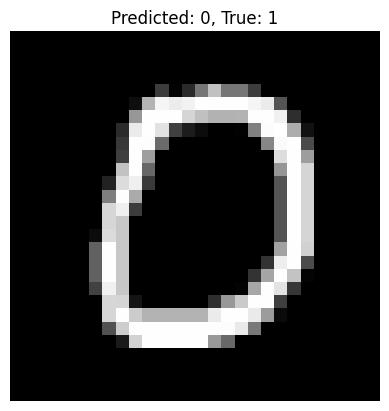

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on test data
predictions = model.predict(x_test)

# Function to display image and prediction
def show_prediction(index):
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[index])}, True: {np.argmax(y_test[index])}")
    plt.axis('off')
    plt.show()

# Display predictions for the first 5 test images
#for i in range(5):
#    show_prediction(i)

show_prediction(10)

